# 제품 이상여부 판별 프로젝트


## 1. 데이터 불러오기


### 필수 라이브러리


In [63]:
import os
from pprint import pprint

import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    accuracy_score,
    classification_report,
    confusion_matrix,
    f1_score,
    precision_score,
    recall_score,
)
from sklearn.model_selection import train_test_split
from tqdm import tqdm

### 데이터 읽어오기


In [64]:
ROOT_DIR = "data"
RANDOM_STATE = 110

# Load data
train_data = pd.read_csv(os.path.join(ROOT_DIR, "train.csv"))
train_data

,Wip Line_Dam,Process Desc._Dam,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,Insp. Seq No._Dam,Insp Judge Code_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION X Unit Time_Dam,CURE END POSITION X Judge Value_Dam,...,Production Qty Collect Result_Fill2,Production Qty Unit Time_Fill2,Production Qty Judge Value_Fill2,Receip No Collect Result_Fill2,Receip No Unit Time_Fill2,Receip No Judge Value_Fill2,WorkMode Collect Result_Fill2,WorkMode Unit Time_Fill2,WorkMode Judge Value_Fill2,target
0,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XA938-1,1,OK,240.0,NaN,NaN,...,7,NaN,NaN,127,NaN,NaN,1,NaN,NaN,Normal
1,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,3KPM0016-2,1,OK,240.0,NaN,NaN,...,185,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal
2,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1X9167-1,1,OK,1000.0,NaN,NaN,...,10,NaN,NaN,73,NaN,NaN,1,NaN,NaN,Normal
3,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3K1X0057-1,1,OK,1000.0,NaN,NaN,...,268,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal
4,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3HPM0007-1,1,OK,240.0,NaN,NaN,...,121,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3J1XF434-2,1,OK,240.0,NaN,NaN,...,318,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal
40502,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1XC796-1,1,OK,1000.0,NaN,NaN,...,14,NaN,NaN,197,NaN,NaN,1,NaN,NaN,Normal
40503,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,4C1XD438-1,1,OK,240.0,NaN,NaN,...,1,NaN,NaN,27,NaN,NaN,1,NaN,NaN,Normal
40504,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3I1XA258-1,1,OK,1000.0,NaN,NaN,...,117,NaN,NaN,1,NaN,NaN,0,NaN,NaN,Normal


In [65]:
# Drop columns with more than half of the values missing
drop_cols = []
for column in train_data.columns:
    if (train_data[column].notnull().sum() // 2) < train_data[
        column
    ].isnull().sum():
        drop_cols.append(column)
train_data = train_data.drop(drop_cols, axis=1)

train_data

,Wip Line_Dam,Process Desc._Dam,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,Insp. Seq No._Dam,Insp Judge Code_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,...,Head Clean Position Z Collect Result_Fill2,Head Purge Position X Collect Result_Fill2,Head Purge Position Y Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2,WorkMode Collect Result_Fill2,target
0,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XA938-1,1,OK,240.0,2.5,-90,...,50.0,91.8,270,50,114.612,19.9,7,127,1,Normal
1,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,3KPM0016-2,1,OK,240.0,2.5,-90,...,91.8,270.0,50,85,19.600,7.0,185,1,0,Normal
2,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1X9167-1,1,OK,1000.0,12.5,90,...,50.0,91.8,270,50,114.612,19.8,10,73,1,Normal
3,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3K1X0057-1,1,OK,1000.0,12.5,90,...,91.8,270.0,50,85,19.900,12.0,268,1,0,Normal
4,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3HPM0007-1,1,OK,240.0,2.5,-90,...,91.8,270.0,50,85,19.700,8.0,121,1,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3J1XF434-2,1,OK,240.0,2.5,-90,...,91.8,270.0,50,85,19.200,1.0,318,1,0,Normal
40502,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1XC796-1,1,OK,1000.0,12.5,90,...,50.0,91.8,270,50,114.612,20.5,14,197,1,Normal
40503,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,4C1XD438-1,1,OK,240.0,2.5,-90,...,50.0,91.8,270,50,85.000,19.7,1,27,1,Normal
40504,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3I1XA258-1,1,OK,1000.0,12.5,90,...,91.8,270.0,50,85,20.100,13.0,117,1,0,Normal


In [66]:
# 각 열의 NaN 값 개수 계산
nan_counts = train_data.isnull().sum()

# NaN 값이 있는 열들만 필터링
nan_columns = nan_counts[nan_counts > 0]

nan_columns

HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam      12766
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1    12766
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2    12766
dtype: int64

In [67]:
# 각 열의 NaN 값이 있는 행을 표시
nan_dam = train_data['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'].isnull()
nan_fill1 = train_data['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1'].isnull()
nan_fill2 = train_data['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2'].isnull()

# 세 열의 NaN 값이 모두 같은 행에서 발생했는지 확인
nan_same_rows = nan_dam & nan_fill1 & nan_fill2

# NaN 값이 동일한 행의 개수 확인
num_same_nan_rows = nan_same_rows.sum()

# 결과 출력
print(f"세 열에서 NaN 값이 동일한 행의 개수: {num_same_nan_rows}")
print(f"세 열에서 NaN 값이 동일한 행:\n{train_data[nan_same_rows]}")

세 열에서 NaN 값이 동일한 행의 개수: 12766
세 열에서 NaN 값이 동일한 행:
      Wip Line_Dam Process Desc._Dam     Equipment_Dam Model.Suffix_Dam  \
0          IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334505   
12         IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
13         IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
18         IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334501   
24         IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334507   
...            ...               ...               ...              ...   
40485      IVI-OB6     Dam Dispenser  Dam dispenser #1      AJX75334501   
40491      IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
40492      IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
40500      IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   
40502      IVI-OB6     Dam Dispenser  Dam dispenser #2      AJX75334501   

       Workorder_Dam  Insp. Seq No._Dam Insp Judg

In [68]:
# 열 목록을 정의
required_columns = [
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Dam',
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill1',
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Judge Value_Fill2',
    'GMES_ORIGIN_INSP_JUDGE_CODE Collect Result_AutoClave',
    'GMES_ORIGIN_INSP_JUDGE_CODE Judge Value_AutoClave'
]

# 존재하는 열들만 필터링
existing_columns = [col for col in required_columns if col in train_data.columns]

# 존재하는 열들 출력
print("존재하는 열들:", existing_columns)

존재하는 열들: []


In [69]:
# Model.Suffix의 값이 공정에 따라 같은지 다른지 비교할 열 리스트
suffix_columns = [
    'Model.Suffix_Dam',
    'Model.Suffix_Fill1',
    'Model.Suffix_Fill2',
    'Model.Suffix_AutoClave'
]

# 각 행에 대해 모든 비교 열의 값이 동일한지 확인
all_equal = train_data[suffix_columns].nunique(axis=1) == 1

# 동일한 값을 가진 행만 필터링하여 네 개의 열만 선택
equal_rows = train_data.loc[all_equal, suffix_columns]

# 동일한 값을 가진 행의 개수와 결과 출력
print(f"동일한 값을 가진 행의 개수: {len(equal_rows)}")
print(equal_rows)

동일한 값을 가진 행의 개수: 40506
      Model.Suffix_Dam Model.Suffix_Fill1 Model.Suffix_Fill2  \
0          AJX75334505        AJX75334505        AJX75334505   
1          AJX75334505        AJX75334505        AJX75334505   
2          AJX75334501        AJX75334501        AJX75334501   
3          AJX75334501        AJX75334501        AJX75334501   
4          AJX75334501        AJX75334501        AJX75334501   
...                ...                ...                ...   
40501      AJX75334501        AJX75334501        AJX75334501   
40502      AJX75334501        AJX75334501        AJX75334501   
40503      AJX75334501        AJX75334501        AJX75334501   
40504      AJX75334501        AJX75334501        AJX75334501   
40505      AJX75334501        AJX75334501        AJX75334501   

      Model.Suffix_AutoClave  
0                AJX75334505  
1                AJX75334505  
2                AJX75334501  
3                AJX75334501  
4                AJX75334501  
...                   

In [70]:
# Workorder의 값이 공정에 따라 같은지 다른지 비교할 열 리스트
suffix_columns = [
    'Workorder_Dam',
    'Workorder_Fill1',
    'Workorder_Fill2',
    'Workorder_AutoClave'
]

# 각 행에 대해 모든 비교 열의 값이 동일한지 확인
all_equal = train_data[suffix_columns].nunique(axis=1) == 1

# 동일한 값을 가진 행만 필터링하여 네 개의 열만 선택
equal_rows = train_data.loc[all_equal, suffix_columns]

# 동일한 값을 가진 행의 개수와 결과 출력
print(f"동일한 값을 가진 행의 개수: {len(equal_rows)}")
print(equal_rows)

동일한 값을 가진 행의 개수: 40506
      Workorder_Dam Workorder_Fill1 Workorder_Fill2 Workorder_AutoClave
0        4F1XA938-1      4F1XA938-1      4F1XA938-1          4F1XA938-1
1        3KPM0016-2      3KPM0016-2      3KPM0016-2          3KPM0016-2
2        4E1X9167-1      4E1X9167-1      4E1X9167-1          4E1X9167-1
3        3K1X0057-1      3K1X0057-1      3K1X0057-1          3K1X0057-1
4        3HPM0007-1      3HPM0007-1      3HPM0007-1          3HPM0007-1
...             ...             ...             ...                 ...
40501    3J1XF434-2      3J1XF434-2      3J1XF434-2          3J1XF434-2
40502    4E1XC796-1      4E1XC796-1      4E1XC796-1          4E1XC796-1
40503    4C1XD438-1      4C1XD438-1      4C1XD438-1          4C1XD438-1
40504    3I1XA258-1      3I1XA258-1      3I1XA258-1          3I1XA258-1
40505    3G1XA501-1      3G1XA501-1      3G1XA501-1          3G1XA501-1

[40506 rows x 4 columns]


In [71]:
# 삭제할 열 리스트
columns_to_drop = [
        'Model.Suffix_Fill1', 'Model.Suffix_Fill2', 'Model.Suffix_AutoClave', 
        'Workorder_Fill1', 'Workorder_Fill2', 'Workorder_AutoClave'
]

# 열 삭제
train_data = train_data.drop(columns=columns_to_drop)

# 열 이름 변경
train_data = train_data.rename(columns={
    'Model.Suffix_Dam': 'Model.Suffix',
    'Workorder_Dam': 'Workorder'
})

train_data

,Wip Line_Dam,Process Desc._Dam,Equipment_Dam,Model.Suffix,Workorder,Insp. Seq No._Dam,Insp Judge Code_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,...,Head Clean Position Z Collect Result_Fill2,Head Purge Position X Collect Result_Fill2,Head Purge Position Y Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2,WorkMode Collect Result_Fill2,target
0,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,4F1XA938-1,1,OK,240.0,2.5,-90,...,50.0,91.8,270,50,114.612,19.9,7,127,1,Normal
1,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334505,3KPM0016-2,1,OK,240.0,2.5,-90,...,91.8,270.0,50,85,19.600,7.0,185,1,0,Normal
2,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1X9167-1,1,OK,1000.0,12.5,90,...,50.0,91.8,270,50,114.612,19.8,10,73,1,Normal
3,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3K1X0057-1,1,OK,1000.0,12.5,90,...,91.8,270.0,50,85,19.900,12.0,268,1,0,Normal
4,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3HPM0007-1,1,OK,240.0,2.5,-90,...,91.8,270.0,50,85,19.700,8.0,121,1,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3J1XF434-2,1,OK,240.0,2.5,-90,...,91.8,270.0,50,85,19.200,1.0,318,1,0,Normal
40502,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4E1XC796-1,1,OK,1000.0,12.5,90,...,50.0,91.8,270,50,114.612,20.5,14,197,1,Normal
40503,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,4C1XD438-1,1,OK,240.0,2.5,-90,...,50.0,91.8,270,50,85.000,19.7,1,27,1,Normal
40504,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3I1XA258-1,1,OK,1000.0,12.5,90,...,91.8,270.0,50,85,20.100,13.0,117,1,0,Normal


In [72]:
# 모든 행이 동일한 값을 가지는 열을 찾고, 그 값을 함께 저장
constant_columns = {col: train_data[col].iloc[0] for col in train_data.columns if train_data[col].nunique() == 1}

# 데이터 프레임에서 해당 열 삭제
train_data = train_data.drop(columns=constant_columns.keys())

# 삭제된 열의 개수 출력
print(f"삭제된 열의 개수: {len(constant_columns)}")

# 삭제된 열과 그 값을 한 줄에 하나씩 출력
print("삭제된 열과 값:")
for col, value in constant_columns.items():
    print(f"{col}: {value}")

train_data

# train_data.to_csv('train_data_중간점검.csv', index=False)

삭제된 열의 개수: 35
삭제된 열과 값:
Wip Line_Dam: IVI-OB6
Process Desc._Dam: Dam Dispenser
Insp. Seq No._Dam: 1
Insp Judge Code_Dam: OK
CURE STANDBY POSITION X Collect Result_Dam: 1150
CURE STANDBY POSITION Z Collect Result_Dam: 33.5
CURE STANDBY POSITION Θ Collect Result_Dam: 0
CURE START POSITION Z Collect Result_Dam: 33.5
Wip Line_AutoClave: IVI-OB6
Process Desc._AutoClave: Auto Clave Out
Equipment_AutoClave: Auto Clave Out
Insp. Seq No._AutoClave: 1
Insp Judge Code_AutoClave: OK
1st Pressure Judge Value_AutoClave: OK
2nd Pressure Judge Value_AutoClave: OK
3rd Pressure Judge Value_AutoClave: OK
Wip Line_Fill1: IVI-OB6
Process Desc._Fill1: Fill1 Dispenser
Insp. Seq No._Fill1: 1
Insp Judge Code_Fill1: OK
Wip Line_Fill2: IVI-OB6
Process Desc._Fill2: Fill2 Dispenser
Insp. Seq No._Fill2: 1
Insp Judge Code_Fill2: OK
CURE END POSITION Θ Collect Result_Fill2: -90
CURE STANDBY POSITION X Collect Result_Fill2: 1020
CURE STANDBY POSITION Θ Collect Result_Fill2: 0
CURE START POSITION Θ Collect Result_Fill2

,Equipment_Dam,Model.Suffix,Workorder,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,...,Head Clean Position Z Collect Result_Fill2,Head Purge Position X Collect Result_Fill2,Head Purge Position Y Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2,WorkMode Collect Result_Fill2,target
0,Dam dispenser #1,AJX75334505,4F1XA938-1,240.0,2.5,-90,100,1030,-90,16,...,50.0,91.8,270,50,114.612,19.9,7,127,1,Normal
1,Dam dispenser #1,AJX75334505,3KPM0016-2,240.0,2.5,-90,70,1030,-90,10,...,91.8,270.0,50,85,19.600,7.0,185,1,0,Normal
2,Dam dispenser #2,AJX75334501,4E1X9167-1,1000.0,12.5,90,85,280,90,16,...,50.0,91.8,270,50,114.612,19.8,10,73,1,Normal
3,Dam dispenser #2,AJX75334501,3K1X0057-1,1000.0,12.5,90,70,280,90,10,...,91.8,270.0,50,85,19.900,12.0,268,1,0,Normal
4,Dam dispenser #1,AJX75334501,3HPM0007-1,240.0,2.5,-90,70,1030,-90,10,...,91.8,270.0,50,85,19.700,8.0,121,1,0,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,Dam dispenser #1,AJX75334501,3J1XF434-2,240.0,2.5,-90,70,1030,-90,10,...,91.8,270.0,50,85,19.200,1.0,318,1,0,Normal
40502,Dam dispenser #2,AJX75334501,4E1XC796-1,1000.0,12.5,90,100,280,90,16,...,50.0,91.8,270,50,114.612,20.5,14,197,1,Normal
40503,Dam dispenser #1,AJX75334501,4C1XD438-1,240.0,2.5,-90,100,1030,-90,16,...,50.0,91.8,270,50,85.000,19.7,1,27,1,Normal
40504,Dam dispenser #2,AJX75334501,3I1XA258-1,1000.0,12.5,90,70,280,90,10,...,91.8,270.0,50,85,20.100,13.0,117,1,0,Normal


In [73]:
# 열 이름 정의
target_column = 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'

# 열의 값들 확인
if target_column not in train_data.columns:
    raise ValueError(f"열 '{target_column}'이(가) 데이터프레임에 없습니다.")

# 고유한 값 추출
unique_values = train_data[target_column].unique()

# 고유한 값들을 포함한 DataFrame 생성
unique_values_df = pd.DataFrame(unique_values, columns=[target_column])

# 결측치와 문자열 포함 모든 고유 값 출력
print(f"'{target_column}' 열의 고유한 값들:")
print(unique_values_df)

# 추가로 결측치와 특정 값('OK')의 존재 여부 확인
nan_count = train_data[target_column].isna().sum()
ok_count = (train_data[target_column] == 'OK').sum()

print(f"\n결측치(NaN) 개수: {nan_count}")
print(f"'OK' 값 개수: {ok_count}")

'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam' 열의 고유한 값들:
  HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam
0                                                NaN      
1                                              550.3      
2                                                 OK      
3                                              162.4      
4                                                549      
5                                              549.5      
6                                                550      
7                                              548.5      

결측치(NaN) 개수: 12766
'OK' 값 개수: 11293


In [74]:
# 열 이름 정의
column_name = 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'

# 열이 데이터프레임에 존재하는지 확인
if column_name not in train_data.columns:
    raise ValueError(f"열 '{column_name}'이(가) 데이터프레임에 없습니다.")

# 해당 열의 모든 값이 숫자인지 확인
has_numeric = train_data[column_name].apply(pd.to_numeric, errors='coerce').notna().any()

# 결과 출력
if has_numeric:
    print(f"열 '{column_name}'에는 숫자가 포함되어 있습니다.")
else:
    print(f"열 '{column_name}'에는 숫자가 포함되어 있지 않습니다.")


열 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'에는 숫자가 포함되어 있습니다.


In [75]:
# 열 이름 정의
column_name = 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'

# 데이터프레임에서 숫자와 숫자가 아닌 값으로 구분하여 두 개의 데이터프레임 생성
train_noshift = train_data[pd.to_numeric(train_data[column_name], errors='coerce').notna()]
train_shift = train_data[pd.to_numeric(train_data[column_name], errors='coerce').isna() | (train_data[column_name] == 'OK')]

# 결과 출력
print("숫자인 경우의 데이터프레임 (train_noshift):")
print(train_noshift)

print("\n숫자가 아닌 경우의 데이터프레임 (train_shift):")
print(train_shift)

# 결과파일 저장
# train_noshift.to_csv('train_noshift.csv', index=False)
# train_shift.to_csv('train_shift.csv', index=False)

숫자인 경우의 데이터프레임 (train_noshift):
          Equipment_Dam Model.Suffix   Workorder  \
1      Dam dispenser #1  AJX75334505  3KPM0016-2   
3      Dam dispenser #2  AJX75334501  3K1X0057-1   
4      Dam dispenser #1  AJX75334501  3HPM0007-1   
5      Dam dispenser #1  AJX75334501  3G1X8297-2   
8      Dam dispenser #1  AJX75334501  3H1X9883-1   
...                 ...          ...         ...   
40497  Dam dispenser #1  AJX75334501  3H1XC952-1   
40498  Dam dispenser #1  AJX75334501  3H1X7981-1   
40501  Dam dispenser #1  AJX75334501  3J1XF434-2   
40504  Dam dispenser #2  AJX75334501  3I1XA258-1   
40505  Dam dispenser #1  AJX75334501  3G1XA501-1   

       CURE END POSITION X Collect Result_Dam  \
1                                       240.0   
3                                      1000.0   
4                                       240.0   
5                                       240.0   
8                                       240.0   
...                                       ...   


In [76]:
# 열 이름 정의
column_fill1 = 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1'

# train_noshift1 및 train_shift1 데이터프레임 생성
train_noshift1 = train_data[pd.to_numeric(train_data[column_fill1], errors='coerce').notna()]
train_shift1 = train_data[pd.to_numeric(train_data[column_fill1], errors='coerce').isna() | (train_data[column_fill1] == 'OK')]

# train_shift와 train_shift1 데이터프레임이 같은지 확인
def are_dataframes_equal(df1, df2):
    return df1.equals(df2)

# train_shift와 train_shift1 비교
dataframes_equal = are_dataframes_equal(train_shift, train_shift1)

# 결과 출력
print("숫자인 경우의 데이터프레임 (train_noshift1):")
print(train_noshift1)

print("\n숫자가 아닌 경우의 데이터프레임 (train_shift1):")
print(train_shift1)

print("\ntrain_shift와 train_shift1이 같은가요?:", dataframes_equal)

숫자인 경우의 데이터프레임 (train_noshift1):
          Equipment_Dam Model.Suffix   Workorder  \
1      Dam dispenser #1  AJX75334505  3KPM0016-2   
3      Dam dispenser #2  AJX75334501  3K1X0057-1   
4      Dam dispenser #1  AJX75334501  3HPM0007-1   
5      Dam dispenser #1  AJX75334501  3G1X8297-2   
8      Dam dispenser #1  AJX75334501  3H1X9883-1   
...                 ...          ...         ...   
40497  Dam dispenser #1  AJX75334501  3H1XC952-1   
40498  Dam dispenser #1  AJX75334501  3H1X7981-1   
40501  Dam dispenser #1  AJX75334501  3J1XF434-2   
40504  Dam dispenser #2  AJX75334501  3I1XA258-1   
40505  Dam dispenser #1  AJX75334501  3G1XA501-1   

       CURE END POSITION X Collect Result_Dam  \
1                                       240.0   
3                                      1000.0   
4                                       240.0   
5                                       240.0   
8                                       240.0   
...                                       ...   

In [77]:
# 선택할 열 범위
start_col = 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'
end_col = 'WorkMode Collect Result_Dam'

# 열 인덱스 찾기
start_index = train_shift.columns.get_loc(start_col)
end_index = train_shift.columns.get_loc(end_col)

# 선택할 열 범위 설정
cols_to_shift = train_shift.iloc[:, start_index:end_index + 1].copy()

# 선택한 열에 대해 shift 적용 (값만 이동)
shifted_values = cols_to_shift.shift(-1, axis=1)

# 원래 데이터프레임에서 선택한 열의 위치에 값만 덮어쓰기
for i, col in enumerate(cols_to_shift.columns):
    train_shift[col] = shifted_values.iloc[:, i]

C:\Users\my pc\AppData\Local\Temp\ipykernel_21056\2970819967.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_shift[col] = shifted_values.iloc[:, i]


In [78]:
# 선택할 열 범위
start_col = 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1'
end_col = 'WorkMode Collect Result_Fill1'

# 열 인덱스 찾기
start_index = train_shift.columns.get_loc(start_col)
end_index = train_shift.columns.get_loc(end_col)

# 선택할 열 범위 설정
cols_to_shift = train_shift.iloc[:, start_index:end_index + 1].copy()

# 선택한 열에 대해 shift 적용 (값만 이동)
shifted_values = cols_to_shift.shift(-1, axis=1)

# 원래 데이터프레임에서 선택한 열의 위치에 값만 덮어쓰기
for i, col in enumerate(cols_to_shift.columns):
    train_shift[col] = shifted_values.iloc[:, i]

C:\Users\my pc\AppData\Local\Temp\ipykernel_21056\3756343480.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_shift[col] = shifted_values.iloc[:, i]


In [79]:
# 선택할 열 범위
start_col = 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2'
end_col = 'WorkMode Collect Result_Fill2'

# 열 인덱스 찾기
start_index = train_shift.columns.get_loc(start_col)
end_index = train_shift.columns.get_loc(end_col)

# 선택할 열 범위 설정
cols_to_shift = train_shift.iloc[:, start_index:end_index + 1].copy()

# 선택한 열에 대해 shift 적용 (값만 이동)
shifted_values = cols_to_shift.shift(-1, axis=1)

# 원래 데이터프레임에서 선택한 열의 위치에 값만 덮어쓰기
for i, col in enumerate(cols_to_shift.columns):
    train_shift[col] = shifted_values.iloc[:, i]

# 결과를 파일로 저장
# train_shift.to_csv('train_shift_corrected.csv', index=False)

C:\Users\my pc\AppData\Local\Temp\ipykernel_21056\2277645347.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_shift[col] = shifted_values.iloc[:, i]


In [80]:
# 열 순서 출력
print("열 순서:")
for i, col in enumerate(train_shift.columns, start=1):
    print(f"{i}: {col}")

열 순서:
1: Equipment_Dam
2: Model.Suffix
3: Workorder
4: CURE END POSITION X Collect Result_Dam
5: CURE END POSITION Z Collect Result_Dam
6: CURE END POSITION Θ Collect Result_Dam
7: CURE SPEED Collect Result_Dam
8: CURE START POSITION X Collect Result_Dam
9: CURE START POSITION Θ Collect Result_Dam
10: DISCHARGED SPEED OF RESIN Collect Result_Dam
11: DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam
12: DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam
13: DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam
14: Dispense Volume(Stage1) Collect Result_Dam
15: Dispense Volume(Stage2) Collect Result_Dam
16: Dispense Volume(Stage3) Collect Result_Dam
17: HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam
18: HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam
19: HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam
20: HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam
21: HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam
22: HEAD NORMAL COORDINATE Y AXIS(Stag

In [81]:
# 열 순서 출력
print("열 순서:")
for i, col in enumerate(train_noshift.columns, start=1):
    print(f"{i}: {col}")

열 순서:
1: Equipment_Dam
2: Model.Suffix
3: Workorder
4: CURE END POSITION X Collect Result_Dam
5: CURE END POSITION Z Collect Result_Dam
6: CURE END POSITION Θ Collect Result_Dam
7: CURE SPEED Collect Result_Dam
8: CURE START POSITION X Collect Result_Dam
9: CURE START POSITION Θ Collect Result_Dam
10: DISCHARGED SPEED OF RESIN Collect Result_Dam
11: DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam
12: DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam
13: DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam
14: Dispense Volume(Stage1) Collect Result_Dam
15: Dispense Volume(Stage2) Collect Result_Dam
16: Dispense Volume(Stage3) Collect Result_Dam
17: HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam
18: HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam
19: HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam
20: HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam
21: HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam
22: HEAD NORMAL COORDINATE Y AXIS(Stag

In [82]:
# 두 데이터프레임 합치기
combined_df = pd.concat([train_shift, train_noshift], axis=0)
combined_df.reset_index(drop=True, inplace=True)

# 제거할 열 리스트
columns_to_drop = ['WorkMode Collect Result_Dam', 'WorkMode Collect Result_Fill1', 'WorkMode Collect Result_Fill2']

# 지정한 열 제거
combined_df = combined_df.drop(columns=columns_to_drop)

# 결과를 CSV 파일로 저장
# combined_df.to_csv('train_shift_final.csv', index=False)

combined_df

,Equipment_Dam,Model.Suffix,Workorder,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,...,Head Clean Position Y Collect Result_Fill2,Head Clean Position Z Collect Result_Fill2,Head Purge Position X Collect Result_Fill2,Head Purge Position Y Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2,target
0,Dam dispenser #1,AJX75334505,4F1XA938-1,240.0,2.5,-90,100,1030,-90,16,...,50.0,91.8,270.0,50,114.612,19.9,7.0,127,1,Normal
1,Dam dispenser #2,AJX75334501,4E1X9167-1,1000.0,12.5,90,85,280,90,16,...,50.0,91.8,270.0,50,114.612,19.8,10.0,73,1,Normal
2,Dam dispenser #1,AJX75334501,3M1XH425-1,240.0,2.5,-90,70,1030,-90,16,...,50.0,91.8,270.0,50,85.000,19.7,8.0,483,1,Normal
3,Dam dispenser #2,AJX75334501,4A1XB542-4,1000.0,12.5,90,70,280,90,16,...,50.0,91.8,270.0,50,85.000,19.9,11.0,105,1,Normal
4,Dam dispenser #2,AJX75334501,4E1X9168-1,1000.0,12.5,90,85,280,90,16,...,50.0,91.8,270.0,50,114.612,20.0,15.0,78,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,Dam dispenser #1,AJX75334501,3H1XC952-1,240.0,2.5,-90,70,1030,-90,10,...,50.0,91.8,270.0,50,85.000,19.6,2.0,56,1,Normal
40502,Dam dispenser #1,AJX75334501,3H1X7981-1,240.0,2.5,-90,70,1030,-90,10,...,50.0,91.8,270.0,50,85.000,19.3,8.0,329,1,Normal
40503,Dam dispenser #1,AJX75334501,3J1XF434-2,240.0,2.5,-90,70,1030,-90,10,...,50.0,91.8,270.0,50,85.000,19.2,1.0,318,1,Normal
40504,Dam dispenser #2,AJX75334501,3I1XA258-1,1000.0,12.5,90,70,280,90,10,...,50.0,91.8,270.0,50,85.000,20.1,13.0,117,1,Normal


In [83]:
# 모든 행이 동일한 값을 가지는 열을 찾고, 그 값을 함께 저장
constant_columns = {col: combined_df[col].iloc[0] for col in combined_df.columns if combined_df[col].nunique() == 1}

# 데이터 프레임에서 해당 열 삭제
combined_df = combined_df.drop(columns=constant_columns.keys())

# 삭제된 열의 개수 출력
print(f"삭제된 열의 개수: {len(constant_columns)}")

# 삭제된 열과 그 값을 한 줄에 하나씩 출력
print("삭제된 열과 값:")
for col, value in constant_columns.items():
    print(f"{col}: {value}")

combined_df

삭제된 열의 개수: 24
삭제된 열과 값:
HEAD Standby Position X Collect Result_Dam: 257.0
HEAD Standby Position Y Collect Result_Dam: 66
HEAD Standby Position Z Collect Result_Dam: 0.0
Head Clean Position X Collect Result_Dam: 127.5
Head Clean Position Y Collect Result_Dam: 66.0
Head Purge Position X Collect Result_Dam: 257.0
Head Purge Position Y Collect Result_Dam: 66.0
Head Zero Position X Collect Result_Dam: 505.0
HEAD Standby Position X Collect Result_Fill1: 289.0
HEAD Standby Position Y Collect Result_Fill1: 50
HEAD Standby Position Z Collect Result_Fill1: 0.0
Head Clean Position X Collect Result_Fill1: 123.4
Head Clean Position Y Collect Result_Fill1: 50.0
Head Clean Position Z Collect Result_Fill1: 92.2
Head Purge Position X Collect Result_Fill1: 289.0
Head Purge Position Y Collect Result_Fill1: 50
HEAD Standby Position X Collect Result_Fill2: 270.0
HEAD Standby Position Y Collect Result_Fill2: 50
HEAD Standby Position Z Collect Result_Fill2: -10
Head Clean Position X Collect Result_Fill2: 119

,Equipment_Dam,Model.Suffix,Workorder,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,...,HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill2,HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill2,HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill2,HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2,target
0,Dam dispenser #1,AJX75334505,4F1XA938-1,240.0,2.5,-90,100,1030,-90,16,...,428.0,243.7,243.7,243.7,114.612,19.9,7.0,127,1,Normal
1,Dam dispenser #2,AJX75334501,4E1X9167-1,1000.0,12.5,90,85,280,90,16,...,1324.2,243.5,243.5,243.5,114.612,19.8,10.0,73,1,Normal
2,Dam dispenser #1,AJX75334501,3M1XH425-1,240.0,2.5,-90,70,1030,-90,16,...,428.0,243.7,243.7,243.7,85.000,19.7,8.0,483,1,Normal
3,Dam dispenser #2,AJX75334501,4A1XB542-4,1000.0,12.5,90,70,280,90,16,...,1324.2,243.5,243.5,243.5,85.000,19.9,11.0,105,1,Normal
4,Dam dispenser #2,AJX75334501,4E1X9168-1,1000.0,12.5,90,85,280,90,16,...,1324.2,243.5,243.5,243.5,114.612,20.0,15.0,78,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,Dam dispenser #1,AJX75334501,3H1XC952-1,240.0,2.5,-90,70,1030,-90,10,...,428.0,243.7,243.7,243.7,85.000,19.6,2.0,56,1,Normal
40502,Dam dispenser #1,AJX75334501,3H1X7981-1,240.0,2.5,-90,70,1030,-90,10,...,428.0,243.7,243.7,243.7,85.000,19.3,8.0,329,1,Normal
40503,Dam dispenser #1,AJX75334501,3J1XF434-2,240.0,2.5,-90,70,1030,-90,10,...,428.0,243.7,243.7,243.7,85.000,19.2,1.0,318,1,Normal
40504,Dam dispenser #2,AJX75334501,3I1XA258-1,1000.0,12.5,90,70,280,90,10,...,1324.2,243.5,243.5,243.5,85.000,20.1,13.0,117,1,Normal


In [84]:
# 문자열 타입인 열들의 이름과 데이터 타입 출력
string_columns = combined_df.select_dtypes(include='object')
string_columns.dtypes

Equipment_Dam                                                 object
Model.Suffix                                                  object
Workorder                                                     object
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam      object
Chamber Temp. Judge Value_AutoClave                           object
Equipment_Fill1                                               object
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1    object
Equipment_Fill2                                               object
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2    object
target                                                        object
dtype: object

In [85]:
# 변환할 열들의 리스트
columns_to_convert = [
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam',
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1',
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2']

# 각 열을 float로 변환
for col in columns_to_convert:
    combined_df[col] = pd.to_numeric(combined_df[col], errors='coerce')

combined_df[columns_to_convert].dtypes

HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam      float64
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1    float64
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2    float64
dtype: object

In [86]:
# 삭제할 열 목록
columns_to_drop = [
    'CURE START POSITION Θ Collect Result_Dam',
    'HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Dam',
    'HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Dam',
    'Stage1 Circle4 Distance Speed Collect Result_Dam',
    'Stage1 Circle3 Distance Speed Collect Result_Dam',
    'Stage1 Circle2 Distance Speed Collect Result_Dam',
    'Stage1 Circle1 Distance Speed Collect Result_Dam',
    'Stage1 Line2 Distance Speed Collect Result_Dam',
    'Stage2 Circle2 Distance Speed Collect Result_Dam',
    'Stage2 Circle4 Distance Speed Collect Result_Dam',
    'Stage2 Circle3 Distance Speed Collect Result_Dam',
    'Stage2 Line4 Distance Speed Collect Result_Dam',
    'Stage3 Line2 Distance Speed Collect Result_Dam',
    'Stage3 Circle2 Distance Speed Collect Result_Dam',
    'Stage3 Circle3 Distance Speed Collect Result_Dam',
    'Stage3 Circle4 Distance Speed Collect Result_Dam',
    'Stage3 Circle1 Distance Speed Collect Result_Dam',
    'CURE START POSITION Z Collect Result_Fill2',
    'HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Fill2',
    'HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill2',
    'HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill2',
    'Workorder'
]

# 열 삭제
combined_df = combined_df.drop(columns=columns_to_drop)

# 결과 확인
combined_df.columns

Index(['Equipment_Dam', 'Model.Suffix',
       'CURE END POSITION X Collect Result_Dam',
       'CURE END POSITION Z Collect Result_Dam',
       'CURE END POSITION Θ Collect Result_Dam',
       'CURE SPEED Collect Result_Dam',
       'CURE START POSITION X Collect Result_Dam',
       'DISCHARGED SPEED OF RESIN Collect Result_Dam',
       'DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam',
       'DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam',
       'DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam',
       'Dispense Volume(Stage1) Collect Result_Dam',
       'Dispense Volume(Stage2) Collect Result_Dam',
       'Dispense Volume(Stage3) Collect Result_Dam',
       'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam',
       'HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam',
       'HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam',
       'HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam',
       'HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect 

## 라벨 인코딩 시작

In [87]:
from sklearn.preprocessing import LabelEncoder

# 'Model.Suffix' 열에 대한 수동 매핑
model_suffix_mapping = {
    'AJX75334501': 7,
    'AJX75334502': 6,
    'AJX75334505': 5,
    'AJX75334503': 4,
    'AJX75334507': 3,
    'AJX75334506': 2,
    'AJX75334508': 1
}

# 'Model.Suffix' 열 변환
combined_df['Model.Suffix'] = combined_df['Model.Suffix'].map(model_suffix_mapping)

# 나머지 열들에 대해 라벨 인코딩 수행
label_encoders = {}
for col in [
    'Equipment_Dam', 'Chamber Temp. Judge Value_AutoClave',
    'Equipment_Fill1', 'Equipment_Fill2'
]:
    le = LabelEncoder()
    combined_df[col] = le.fit_transform(combined_df[col])
    label_encoders[col] = le

# 'Model.Suffix' 열의 결과 확인
print(f"\n'Model.Suffix' 열 변환 결과:")
print(combined_df['Model.Suffix'].unique())

# 나머지 열의 인코딩 결과 확인
for col, le in label_encoders.items():
    print(f"\nColumn: {col}")
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"Label encoding mapping:\n{mapping}")

combined_df


'Model.Suffix' 열 변환 결과:
[5 7 6 3 2 1 4]

Column: Equipment_Dam
Label encoding mapping:
{'Dam dispenser #1': 0, 'Dam dispenser #2': 1}

Column: Chamber Temp. Judge Value_AutoClave
Label encoding mapping:
{'NG': 0, 'OK': 1}

Column: Equipment_Fill1
Label encoding mapping:
{'Fill1 dispenser #1': 0, 'Fill1 dispenser #2': 1}

Column: Equipment_Fill2
Label encoding mapping:
{'Fill2 dispenser #1': 0, 'Fill2 dispenser #2': 1}


,Equipment_Dam,Model.Suffix,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE START POSITION X Collect Result_Dam,DISCHARGED SPEED OF RESIN Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam,DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam,...,HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Fill2,HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill2,HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill2,HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2,target
0,0,5,240.0,2.5,-90,100,1030,16,14.9,8.4,...,156.0,427.9,428.0,243.7,114.612,19.9,7.0,127,1,Normal
1,1,7,1000.0,12.5,90,85,280,16,14.7,8.5,...,694.0,1324.2,1324.2,243.5,114.612,19.8,10.0,73,1,Normal
2,0,7,240.0,2.5,-90,70,1030,16,13.2,6.5,...,156.0,427.9,428.0,243.7,85.000,19.7,8.0,483,1,Normal
3,1,7,1000.0,12.5,90,70,280,16,13.2,7.6,...,694.0,1324.2,1324.2,243.5,85.000,19.9,11.0,105,1,Normal
4,1,7,1000.0,12.5,90,85,280,16,14.7,8.5,...,694.0,1324.2,1324.2,243.5,114.612,20.0,15.0,78,1,Normal
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
40501,0,7,240.0,2.5,-90,70,1030,10,9.7,4.9,...,156.0,427.9,428.0,243.7,85.000,19.6,2.0,56,1,Normal
40502,0,7,240.0,2.5,-90,70,1030,10,9.7,4.9,...,156.0,427.9,428.0,243.7,85.000,19.3,8.0,329,1,Normal
40503,0,7,240.0,2.5,-90,70,1030,10,17.0,5.0,...,156.0,427.9,428.0,243.7,85.000,19.2,1.0,318,1,Normal
40504,1,7,1000.0,12.5,90,70,280,10,9.7,4.9,...,694.0,1324.2,1324.2,243.5,85.000,20.1,13.0,117,1,Normal


### 변수 선택 - 피쳐 중요도 분석(랜덤 포레스트)

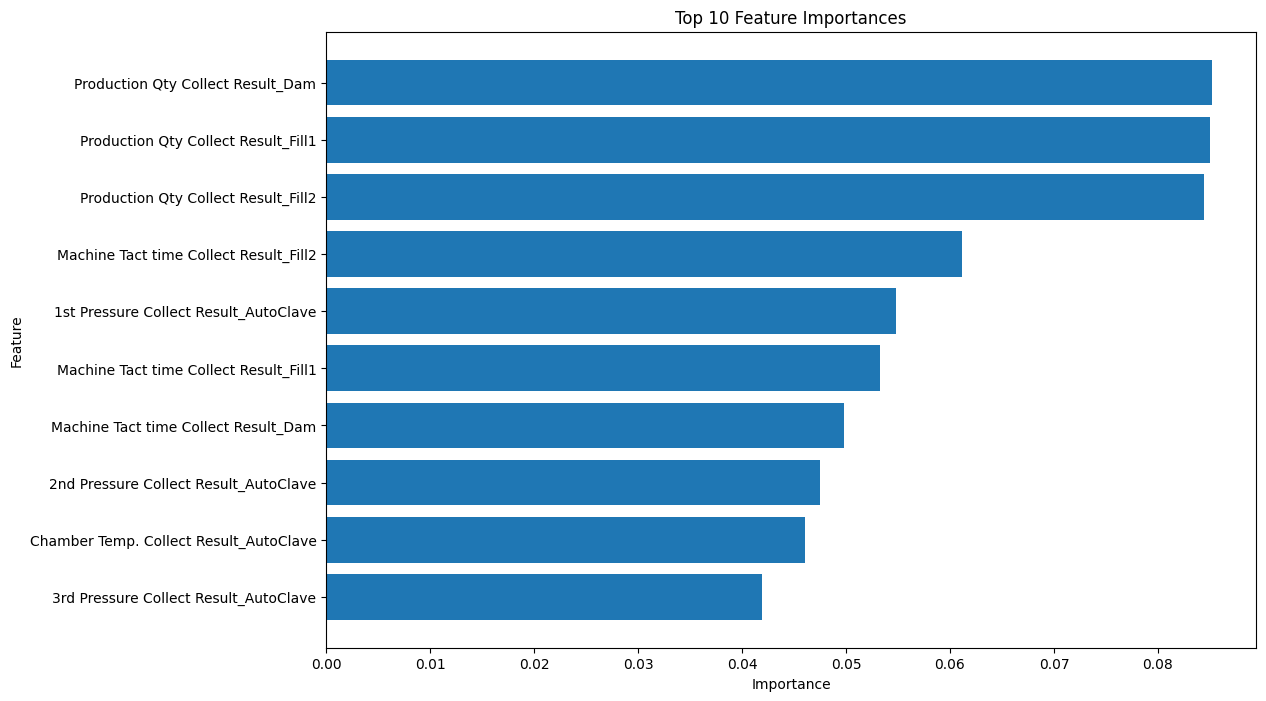

In [88]:
from sklearn.ensemble import RandomForestClassifier
import numpy as np
import matplotlib.pyplot as plt

# 타깃 변수를 'AbNormal'로 인코딩 (1 for 'AbNormal', 0 for 'Normal')
combined_df['target'] = combined_df['target'].apply(lambda x: 1 if x == 'AbNormal' else 0)

# 특성(X)과 타깃(y) 설정
X = combined_df.drop('target', axis=1)
y = combined_df['target']

# 모든 특성을 수치형으로 변환
X = X.apply(pd.to_numeric, errors='coerce')

# 랜덤 포레스트 모델 학습
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# 피처 중요도 추출
importances = model.feature_importances_

# 피처 중요도 상위 10개 추출
indices = np.argsort(importances)[::-1]
top_n = 10
top_indices = indices[:top_n]

# 상위 10개 피처와 중요도
top_features = [X.columns[i] for i in top_indices]
top_importances = importances[top_indices]

# 그래프 그리기
plt.figure(figsize=(12, 8))
plt.title("Top 10 Feature Importances")
plt.barh(top_features, top_importances, align='center')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.gca().invert_yaxis()  # 상위 피처가 위에 오도록
plt.show()

### 변수 선택 - SHAP 값

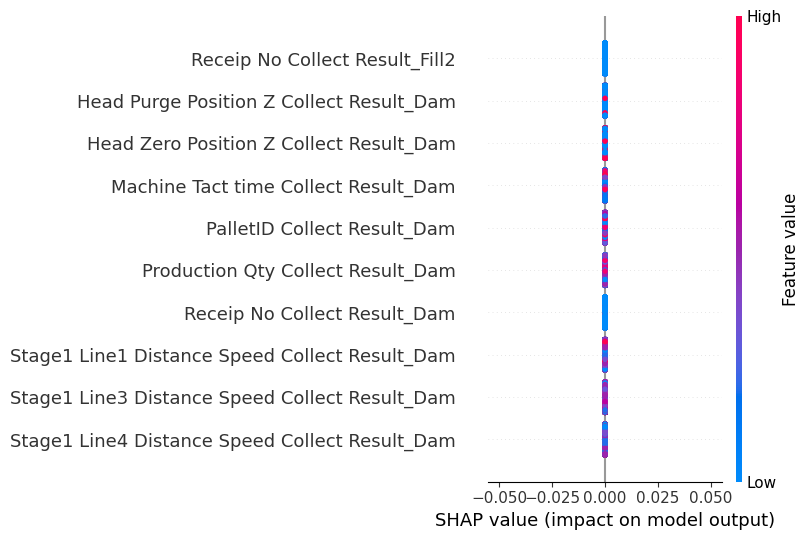

In [89]:
import shap
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

# 타깃 변수를 'AbNormal'로 인코딩 (1 for 'AbNormal', 0 for 'Normal')
combined_df['target'] = combined_df['target'].apply(lambda x: 1 if x == 'AbNormal' else 0)

# 특성(X)과 타깃(y) 설정
X = combined_df.drop('target', axis=1)
y = combined_df['target']

# 모든 특성을 수치형으로 변환
X = X.apply(pd.to_numeric, errors='coerce')

# 결측값 처리 (여기서는 간단하게 0으로 채움, 다른 방법을 사용할 수도 있음)
X = X.fillna(0)

# 랜덤 포레스트 모델 학습
model = RandomForestClassifier(random_state=42)
model.fit(X, y)

# SHAP 값 계산
explainer = shap.Explainer(model, X)
shap_values = explainer(X)

# SHAP 값의 중요도를 상위 10개 피처로 시각화
shap.summary_plot(shap_values, X, max_display=10)


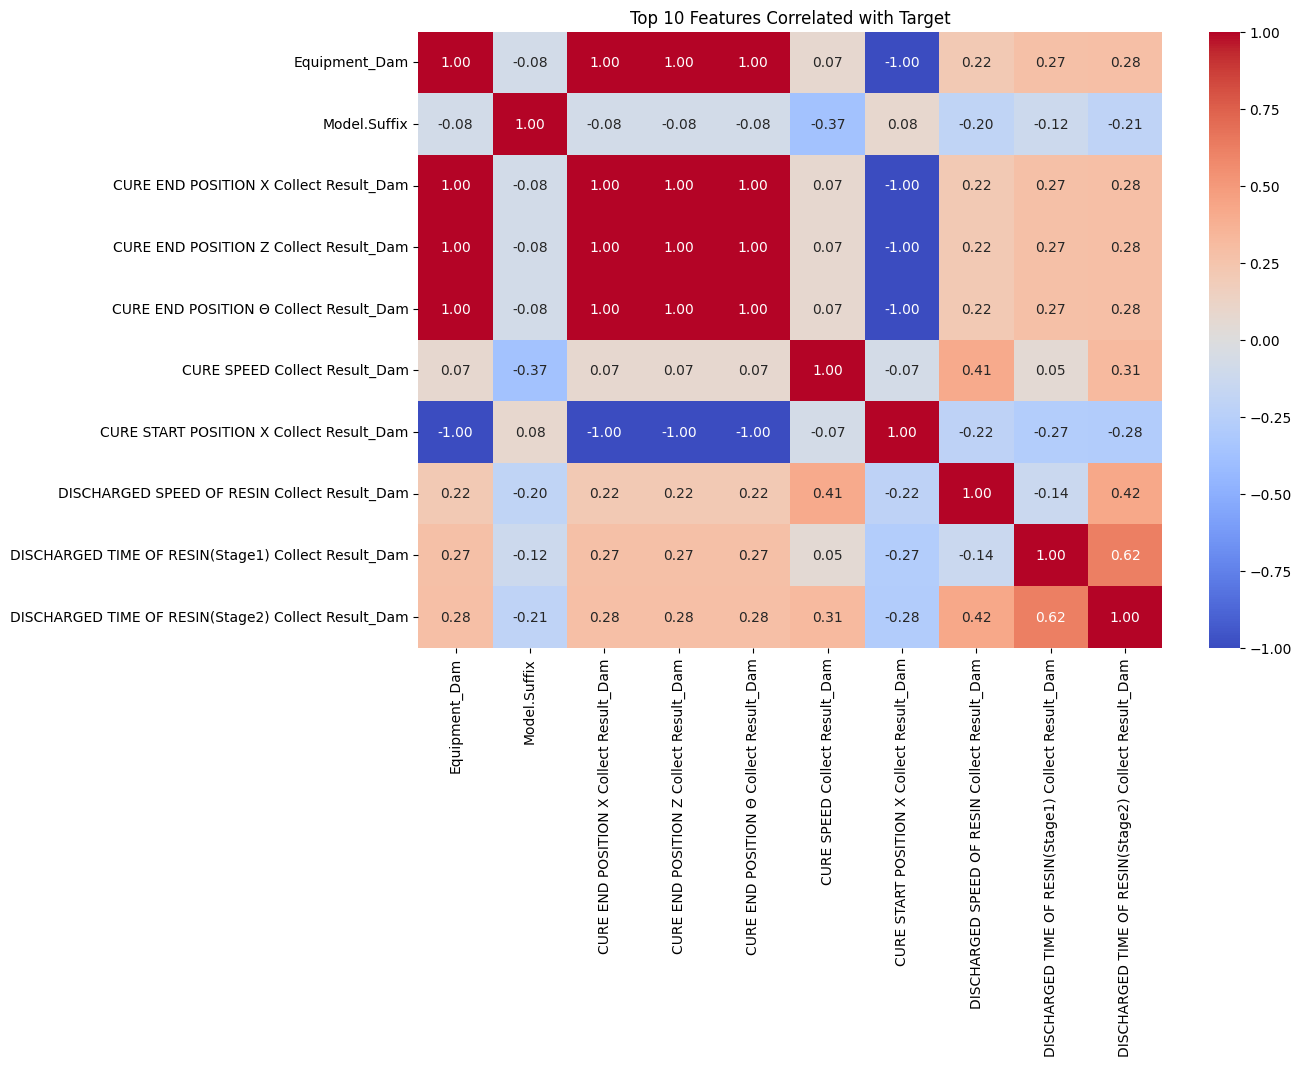

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 타깃 변수를 'AbNormal'로 인코딩 (1 for 'AbNormal', 0 for 'Normal')
combined_df['target'] = combined_df['target'].apply(lambda x: 1 if x == 'AbNormal' else 0)

# 특성(X)와 타깃(y) 설정
X = combined_df.drop('target', axis=1)
y = combined_df['target']

# 모든 특성을 수치형으로 변환
X = X.apply(pd.to_numeric, errors='coerce')

# 결측값 처리 (여기서는 간단하게 0으로 채움, 다른 방법을 사용할 수도 있음)
X = X.fillna(0)

# 타깃 변수와 피처 간의 상관계수 계산
correlation_matrix = X.copy()
correlation_matrix['target'] = y
correlation_matrix = correlation_matrix.corr()

# 타깃 변수와 상관관계가 있는 피처 추출
target_corr = correlation_matrix['target'].drop('target')

# 상위 10개 상관관계 높은 피처 추출
top_10_features = target_corr.abs().nlargest(10).index

# 상관관계 시각화
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix.loc[top_10_features, top_10_features], annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Top 10 Features Correlated with Target')
plt.show()

모든 변수와 타깃 변수 간의 상관계수:
Equipment_Dam: nan
Model.Suffix: nan
CURE END POSITION X Collect Result_Dam: nan
CURE END POSITION Z Collect Result_Dam: nan
CURE END POSITION Θ Collect Result_Dam: nan
CURE SPEED Collect Result_Dam: nan
CURE START POSITION X Collect Result_Dam: nan
DISCHARGED SPEED OF RESIN Collect Result_Dam: nan
DISCHARGED TIME OF RESIN(Stage1) Collect Result_Dam: nan
DISCHARGED TIME OF RESIN(Stage2) Collect Result_Dam: nan
DISCHARGED TIME OF RESIN(Stage3) Collect Result_Dam: nan
Dispense Volume(Stage1) Collect Result_Dam: nan
Dispense Volume(Stage2) Collect Result_Dam: nan
Dispense Volume(Stage3) Collect Result_Dam: nan
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam: nan
HEAD NORMAL COORDINATE X AXIS(Stage2) Collect Result_Dam: nan
HEAD NORMAL COORDINATE X AXIS(Stage3) Collect Result_Dam: nan
HEAD NORMAL COORDINATE Y AXIS(Stage1) Collect Result_Dam: nan
HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Dam: nan
HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_

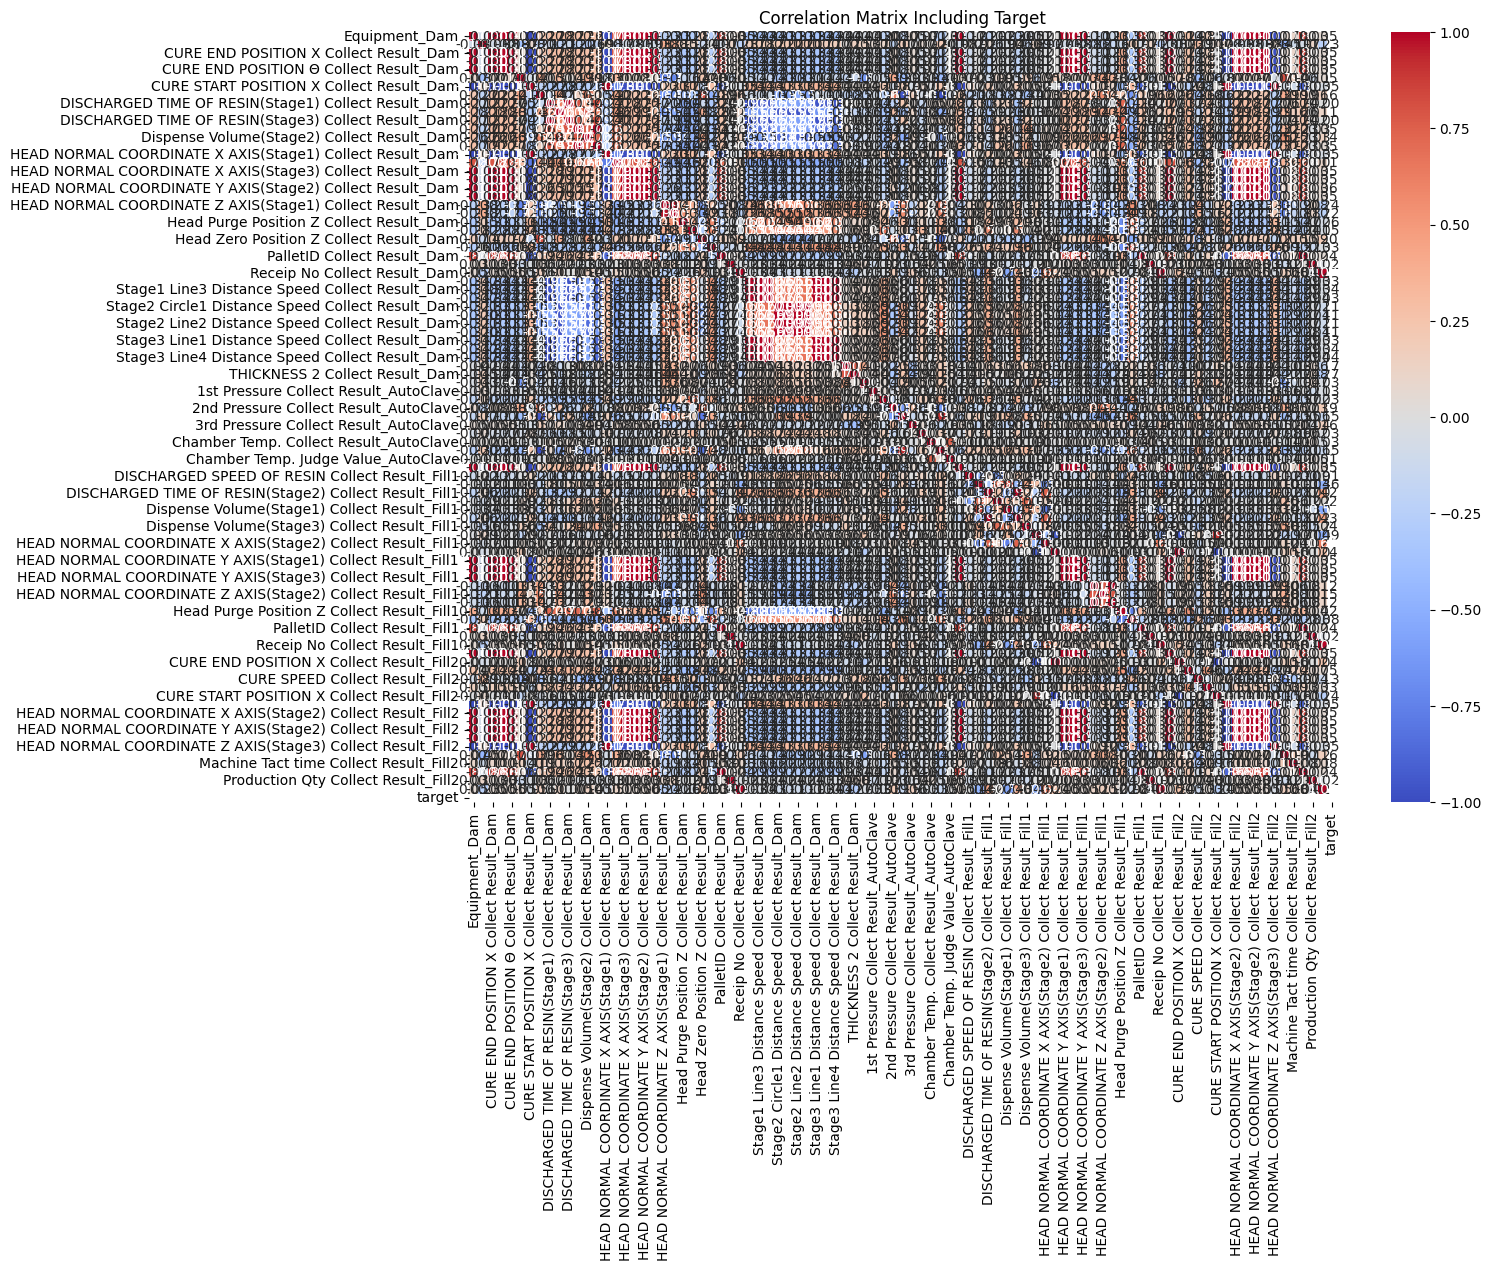

In [95]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 타깃 변수를 'AbNormal'로 인코딩 (1 for 'AbNormal', 0 for 'Normal')
combined_df['target'] = combined_df['target'].apply(lambda x: 1 if x == 'AbNormal' else 0)

# 특성(X)와 타깃(y) 설정
X = combined_df.drop('target', axis=1)
y = combined_df['target']

# 모든 특성을 수치형으로 변환
X = X.apply(pd.to_numeric, errors='coerce')

# 타깃 변수와 피처 간의 상관계수 계산
correlation_matrix = X.copy()
correlation_matrix['target'] = y
correlation_matrix = correlation_matrix.corr()

# 타깃 변수와 상관관계가 있는 피처 추출
target_corr = correlation_matrix['target'].drop('target')

# 모든 변수와 타깃 사이의 상관계수 출력
print("모든 변수와 타깃 변수 간의 상관계수:")
for feature, corr in target_corr.items():
    print(f"{feature}: {corr:.2f}")

# 상관관계 시각화
plt.figure(figsize=(14, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix Including Target')
plt.show()

In [92]:
sdf

NameError: name 'sdf' is not defined

In [ ]:
train_data = combined_df

# 전처리 끝!!!

In [ ]:
## 오버샘플링
import pandas as pd
from sklearn.utils import resample

# 랜덤 시드 설정 (필요시 정의)
RANDOM_STATE = 42

# 타겟값이 'Normal'인 데이터와 'AbNormal'인 데이터로 분리
df_normal = train_data[train_data["target"] == "Normal"]
df_abnormal = train_data[train_data["target"] == "AbNormal"]

num_normal = len(df_normal)
num_abnormal = len(df_abnormal)
print(f"  Total: Normal: {num_normal}, AbNormal: {num_abnormal}")

# 오버샘플링: 'AbNormal' 데이터 수를 'Normal' 데이터 수와 맞추기
df_abnormal_oversampled = resample(
    df_abnormal,
    replace=True,  # 샘플링 시복제
    n_samples=num_normal,  # 'Normal' 데이터 수만큼 복제
    random_state=RANDOM_STATE
)

# 오버샘플링된 'AbNormal' 데이터와 원본 'Normal' 데이터 합치기
df_concat = pd.concat([df_normal, df_abnormal_oversampled], axis=0).reset_index(drop=True)

# 타겟값의 분포 확인
df_concat['target'].value_counts()

  Total: Normal: 38156, AbNormal: 2350


target
Normal      38156
AbNormal    38156
Name: count, dtype: int64

### 데이터 분할


In [ ]:
df_train, df_val = train_test_split(
    df_concat,
    test_size=0.3,
    stratify=df_concat["target"],
    random_state=RANDOM_STATE,
)


def print_stats(df: pd.DataFrame):
    num_normal = len(df[df["target"] == "Normal"])
    num_abnormal = len(df[df["target"] == "AbNormal"])

    print(f"  Total: Normal: {num_normal}, AbNormal: {num_abnormal}" + f" ratio: {num_abnormal/num_normal}")


# Print statistics
print(f"  \tAbnormal\tNormal")
print_stats(df_train)
print_stats(df_val)

  	Abnormal	Normal
  Total: Normal: 26709, AbNormal: 26709 ratio: 1.0
  Total: Normal: 11447, AbNormal: 11447 ratio: 1.0


## 3. 모델 학습


### 모델 정의


In [ ]:
model = RandomForestClassifier(random_state=RANDOM_STATE)

### 모델 학습


In [ ]:
features = []

for col in df_train.columns:
    try:
        df_train[col] = df_train[col].astype(int)
        features.append(col)
    except:
        continue

train_x = df_train[features]
train_y = df_train["target"]

model.fit(train_x, train_y)

RandomForestClassifier(random_state=42)

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score

# 검증 데이터 준비
val_x = df_val[features]
val_y = df_val["target"]

# 검증 데이터에 대한 예측
val_predictions = model.predict(val_x)

# 정확도 계산
val_accuracy = accuracy_score(val_y, val_predictions)

# F1 스코어 계산
val_f1_score = f1_score(val_y, val_predictions, pos_label="AbNormal")

# 결과 출력
print(f"검증 데이터 정확도: {val_accuracy:.4f}")
print(f"검증 데이터 F1 스코어: {val_f1_score:.4f}")

검증 데이터 정확도: 0.7729
검증 데이터 F1 스코어: 0.7099


## 4. 제출하기


### 테스트 데이터 예측


테스트 데이터 불러오기


In [ ]:
test_data = pd.read_csv(os.path.join(ROOT_DIR, "test.csv"))
test_data

,Set ID,Wip Line_Dam,Process Desc._Dam,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,Insp. Seq No._Dam,Insp Judge Code_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION X Unit Time_Dam,...,Production Qty Collect Result_Fill2,Production Qty Unit Time_Fill2,Production Qty Judge Value_Fill2,Receip No Collect Result_Fill2,Receip No Unit Time_Fill2,Receip No Judge Value_Fill2,WorkMode Collect Result_Fill2,WorkMode Unit Time_Fill2,WorkMode Judge Value_Fill2,target
0,0001be084fbc4aaa9d921f39e595961b,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3J1XF767-1,1,OK,1000.0,NaN,...,195,NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN
1,0005bbd180064abd99e63f9ed3e1ac80,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4B1XD472-2,1,OK,1000.0,NaN,...,14,NaN,NaN,256,NaN,NaN,1,NaN,NaN,NaN
2,000948934c4140d883d670adcb609584,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3H1XE355-1,1,OK,240.0,NaN,...,98,NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN
3,000a6bfd02874c6296dc7b2e9c5678a7,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3L1XA128-1,1,OK,1000.0,NaN,...,14,NaN,NaN,0,NaN,NaN,1,NaN,NaN,NaN
4,0018e78ce91343678716e2ea27a51c95,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,4A1XA639-1,1,OK,240.0,NaN,...,1,NaN,NaN,215,NaN,NaN,1,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17356,ffea508b59934d689b540f95eb3fa730,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3K1XB597-1,1,OK,1000.0,NaN,...,14,NaN,NaN,131,NaN,NaN,1,NaN,NaN,NaN
17357,ffed8923c8a448a98afc641b770be153,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4A1XB974-1,1,OK,1000.0,NaN,...,12,NaN,NaN,279,NaN,NaN,1,NaN,NaN,NaN
17358,fff1e73734da40adbe805359b3efb462,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3L1XA998-1,1,OK,240.0,NaN,...,4,NaN,NaN,66,NaN,NaN,1,NaN,NaN,NaN
17359,fff8e38bdd09470baf95f71e92075dec,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3F1XC376-1,1,OK,240.0,NaN,...,117,NaN,NaN,1,NaN,NaN,0,NaN,NaN,NaN


In [ ]:
# Drop columns with more than half of the values missing
drop_cols = []
for column in test_data.columns:
    if (test_data[column].notnull().sum() // 2) < test_data[
        column
    ].isnull().sum():
        drop_cols.append(column)
test_data = test_data.drop(drop_cols, axis=1)

test_data

,Set ID,Wip Line_Dam,Process Desc._Dam,Equipment_Dam,Model.Suffix_Dam,Workorder_Dam,Insp. Seq No._Dam,Insp Judge Code_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,...,Head Clean Position Y Collect Result_Fill2,Head Clean Position Z Collect Result_Fill2,Head Purge Position X Collect Result_Fill2,Head Purge Position Y Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2,WorkMode Collect Result_Fill2
0,0001be084fbc4aaa9d921f39e595961b,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3J1XF767-1,1,OK,1000.0,12.5,...,50,91.8,270.0,50,85,19.8,13.0,195,1,0
1,0005bbd180064abd99e63f9ed3e1ac80,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4B1XD472-2,1,OK,1000.0,12.5,...,119,50.0,91.8,270,50,85.0,19.8,14,256,1
2,000948934c4140d883d670adcb609584,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3H1XE355-1,1,OK,240.0,2.5,...,50,91.8,270.0,50,85,19.7,1.0,98,1,0
3,000a6bfd02874c6296dc7b2e9c5678a7,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3L1XA128-1,1,OK,1000.0,12.5,...,119,50.0,91.8,270,50,85.0,20.0,14,0,1
4,0018e78ce91343678716e2ea27a51c95,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,4A1XA639-1,1,OK,240.0,2.5,...,119,50.0,91.8,270,50,85.0,19.8,1,215,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17356,ffea508b59934d689b540f95eb3fa730,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3K1XB597-1,1,OK,1000.0,12.5,...,119,50.0,91.8,270,50,85.0,19.5,14,131,1
17357,ffed8923c8a448a98afc641b770be153,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4A1XB974-1,1,OK,1000.0,12.5,...,119,50.0,91.8,270,50,85.0,19.8,12,279,1
17358,fff1e73734da40adbe805359b3efb462,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3L1XA998-1,1,OK,240.0,2.5,...,119,50.0,91.8,270,50,85.0,20.5,4,66,1
17359,fff8e38bdd09470baf95f71e92075dec,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3F1XC376-1,1,OK,240.0,2.5,...,50,91.8,270.0,50,85,18.9,1.0,117,1,0


In [ ]:
# 각 열의 NaN 값 개수 계산
nan_counts = test_data.isnull().sum()

# NaN 값이 있는 열들만 필터링
nan_columns = nan_counts[nan_counts > 0]

nan_columns

HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam      5468
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1    5468
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2    5468
dtype: int64

In [ ]:
# 각 열의 NaN 값이 있는 행을 표시
nan_dam = test_data['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'].isnull()
nan_fill1 = test_data['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1'].isnull()
nan_fill2 = test_data['HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2'].isnull()

# 세 열의 NaN 값이 모두 같은 행에서 발생했는지 확인
nan_same_rows = nan_dam & nan_fill1 & nan_fill2

# NaN 값이 동일한 행의 개수 확인
num_same_nan_rows = nan_same_rows.sum()

# 결과 출력
print(f"세 열에서 NaN 값이 동일한 행의 개수: {num_same_nan_rows}")
print(f"세 열에서 NaN 값이 동일한 행:\n{test_data[nan_same_rows]}")

세 열에서 NaN 값이 동일한 행의 개수: 5468
세 열에서 NaN 값이 동일한 행:
                                 Set ID Wip Line_Dam Process Desc._Dam  \
3      000a6bfd02874c6296dc7b2e9c5678a7      IVI-OB6     Dam Dispenser   
8      00297b6c93e44d49ac534758a23dc74e      IVI-OB6     Dam Dispenser   
9      002d904240d84b188d410d16383a9c3a      IVI-OB6     Dam Dispenser   
10     002fdfad651c4a98b6f0c4046976aac3      IVI-OB6     Dam Dispenser   
13     0039b02541014d678d5b0e5a3cb3797a      IVI-OB6     Dam Dispenser   
...                                 ...          ...               ...   
17349  ffd71ad9aac547a4a367d538c6e3ee30      IVI-OB6     Dam Dispenser   
17354  ffe5c71ef7b045868d177023be7f364b      IVI-OB6     Dam Dispenser   
17355  ffe77be574b24429b1bf6a69b5c2c2ef      IVI-OB6     Dam Dispenser   
17356  ffea508b59934d689b540f95eb3fa730      IVI-OB6     Dam Dispenser   
17358  fff1e73734da40adbe805359b3efb462      IVI-OB6     Dam Dispenser   

          Equipment_Dam Model.Suffix_Dam Workorder_Dam  Insp. 

In [ ]:
# 삭제할 열 리스트
columns_to_drop = [
        'Model.Suffix_Fill1', 'Model.Suffix_Fill2', 'Model.Suffix_AutoClave', 
        'Workorder_Fill1', 'Workorder_Fill2', 'Workorder_AutoClave'
]

# 열 삭제
test_data = test_data.drop(columns=columns_to_drop)

# 열 이름 변경
test_data = test_data.rename(columns={
    'Model.Suffix_Dam': 'Model.Suffix',
    'Workorder_Dam': 'Workorder'
})

test_data

,Set ID,Wip Line_Dam,Process Desc._Dam,Equipment_Dam,Model.Suffix,Workorder,Insp. Seq No._Dam,Insp Judge Code_Dam,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,...,Head Clean Position Y Collect Result_Fill2,Head Clean Position Z Collect Result_Fill2,Head Purge Position X Collect Result_Fill2,Head Purge Position Y Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2,WorkMode Collect Result_Fill2
0,0001be084fbc4aaa9d921f39e595961b,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3J1XF767-1,1,OK,1000.0,12.5,...,50,91.8,270.0,50,85,19.8,13.0,195,1,0
1,0005bbd180064abd99e63f9ed3e1ac80,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4B1XD472-2,1,OK,1000.0,12.5,...,119,50.0,91.8,270,50,85.0,19.8,14,256,1
2,000948934c4140d883d670adcb609584,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3H1XE355-1,1,OK,240.0,2.5,...,50,91.8,270.0,50,85,19.7,1.0,98,1,0
3,000a6bfd02874c6296dc7b2e9c5678a7,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3L1XA128-1,1,OK,1000.0,12.5,...,119,50.0,91.8,270,50,85.0,20.0,14,0,1
4,0018e78ce91343678716e2ea27a51c95,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,4A1XA639-1,1,OK,240.0,2.5,...,119,50.0,91.8,270,50,85.0,19.8,1,215,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17356,ffea508b59934d689b540f95eb3fa730,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,3K1XB597-1,1,OK,1000.0,12.5,...,119,50.0,91.8,270,50,85.0,19.5,14,131,1
17357,ffed8923c8a448a98afc641b770be153,IVI-OB6,Dam Dispenser,Dam dispenser #2,AJX75334501,4A1XB974-1,1,OK,1000.0,12.5,...,119,50.0,91.8,270,50,85.0,19.8,12,279,1
17358,fff1e73734da40adbe805359b3efb462,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3L1XA998-1,1,OK,240.0,2.5,...,119,50.0,91.8,270,50,85.0,20.5,4,66,1
17359,fff8e38bdd09470baf95f71e92075dec,IVI-OB6,Dam Dispenser,Dam dispenser #1,AJX75334501,3F1XC376-1,1,OK,240.0,2.5,...,50,91.8,270.0,50,85,18.9,1.0,117,1,0


In [ ]:
# 모든 행이 동일한 값을 가지는 열을 찾고, 그 값을 함께 저장
constant_columns = {col: test_data[col].iloc[0] for col in test_data.columns if test_data[col].nunique() == 1}

# 데이터 프레임에서 해당 열 삭제
test_data = test_data.drop(columns=constant_columns.keys())

# 삭제된 열의 개수 출력
print(f"삭제된 열의 개수: {len(constant_columns)}")

# 삭제된 열과 그 값을 한 줄에 하나씩 출력
print("삭제된 열과 값:")
for col, value in constant_columns.items():
    print(f"{col}: {value}")

test_data

삭제된 열의 개수: 35
삭제된 열과 값:
Wip Line_Dam: IVI-OB6
Process Desc._Dam: Dam Dispenser
Insp. Seq No._Dam: 1
Insp Judge Code_Dam: OK
CURE STANDBY POSITION X Collect Result_Dam: 1150
CURE STANDBY POSITION Z Collect Result_Dam: 33.5
CURE STANDBY POSITION Θ Collect Result_Dam: 0
CURE START POSITION Z Collect Result_Dam: 33.5
Wip Line_AutoClave: IVI-OB6
Process Desc._AutoClave: Auto Clave Out
Equipment_AutoClave: Auto Clave Out
Insp. Seq No._AutoClave: 1
Insp Judge Code_AutoClave: OK
1st Pressure Judge Value_AutoClave: OK
2nd Pressure Judge Value_AutoClave: OK
3rd Pressure Judge Value_AutoClave: OK
Wip Line_Fill1: IVI-OB6
Process Desc._Fill1: Fill1 Dispenser
Insp. Seq No._Fill1: 1
Insp Judge Code_Fill1: OK
Wip Line_Fill2: IVI-OB6
Process Desc._Fill2: Fill2 Dispenser
Insp. Seq No._Fill2: 1
Insp Judge Code_Fill2: OK
CURE END POSITION Θ Collect Result_Fill2: -90
CURE STANDBY POSITION X Collect Result_Fill2: 1020
CURE STANDBY POSITION Θ Collect Result_Fill2: 0
CURE START POSITION Θ Collect Result_Fill2

,Set ID,Equipment_Dam,Model.Suffix,Workorder,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam,...,Head Clean Position Y Collect Result_Fill2,Head Clean Position Z Collect Result_Fill2,Head Purge Position X Collect Result_Fill2,Head Purge Position Y Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2,WorkMode Collect Result_Fill2
0,0001be084fbc4aaa9d921f39e595961b,Dam dispenser #2,AJX75334501,3J1XF767-1,1000.0,12.5,90,70,280,90,...,50,91.8,270.0,50,85,19.8,13.0,195,1,0
1,0005bbd180064abd99e63f9ed3e1ac80,Dam dispenser #2,AJX75334501,4B1XD472-2,1000.0,12.5,90,70,280,90,...,119,50.0,91.8,270,50,85.0,19.8,14,256,1
2,000948934c4140d883d670adcb609584,Dam dispenser #1,AJX75334501,3H1XE355-1,240.0,2.5,-90,70,1030,-90,...,50,91.8,270.0,50,85,19.7,1.0,98,1,0
3,000a6bfd02874c6296dc7b2e9c5678a7,Dam dispenser #2,AJX75334501,3L1XA128-1,1000.0,12.5,90,70,280,90,...,119,50.0,91.8,270,50,85.0,20.0,14,0,1
4,0018e78ce91343678716e2ea27a51c95,Dam dispenser #1,AJX75334501,4A1XA639-1,240.0,2.5,-90,70,1030,-90,...,119,50.0,91.8,270,50,85.0,19.8,1,215,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17356,ffea508b59934d689b540f95eb3fa730,Dam dispenser #2,AJX75334501,3K1XB597-1,1000.0,12.5,90,70,280,90,...,119,50.0,91.8,270,50,85.0,19.5,14,131,1
17357,ffed8923c8a448a98afc641b770be153,Dam dispenser #2,AJX75334501,4A1XB974-1,1000.0,12.5,90,70,280,90,...,119,50.0,91.8,270,50,85.0,19.8,12,279,1
17358,fff1e73734da40adbe805359b3efb462,Dam dispenser #1,AJX75334501,3L1XA998-1,240.0,2.5,-90,70,1030,-90,...,119,50.0,91.8,270,50,85.0,20.5,4,66,1
17359,fff8e38bdd09470baf95f71e92075dec,Dam dispenser #1,AJX75334501,3F1XC376-1,240.0,2.5,-90,70,1030,-90,...,50,91.8,270.0,50,85,18.9,1.0,117,1,0


In [ ]:
# 열 이름 정의
column_name = 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'

# 데이터프레임에서 숫자와 숫자가 아닌 값으로 구분하여 두 개의 데이터프레임 생성
test_noshift = test_data[pd.to_numeric(test_data[column_name], errors='coerce').notna()]
test_shift = test_data[pd.to_numeric(test_data[column_name], errors='coerce').isna() | (test_data[column_name] == 'OK')]

# 결과 출력
print("숫자인 경우의 데이터프레임 (test_noshift):")
print(test_noshift)

print("\n숫자가 아닌 경우의 데이터프레임 (test_shift):")
print(test_shift)

숫자인 경우의 데이터프레임 (test_noshift):
                                 Set ID     Equipment_Dam Model.Suffix  \
0      0001be084fbc4aaa9d921f39e595961b  Dam dispenser #2  AJX75334501   
2      000948934c4140d883d670adcb609584  Dam dispenser #1  AJX75334501   
5      001fda4596f545d0a3b0ce85fbea77d2  Dam dispenser #1  AJX75334501   
6      0020734a7b29472298358ad58645a0c9  Dam dispenser #1  AJX75334501   
7      00234c5914cd4c4a888d13f8b3773135  Dam dispenser #1  AJX75334501   
...                                 ...               ...          ...   
17343  ffc7abf0560a4d21a348aa387198a14a  Dam dispenser #1  AJX75334501   
17350  ffdb6e67f46946a49a196fb9a5c6cb2d  Dam dispenser #1  AJX75334502   
17353  ffe068b7753a438388a289aaab7d778f  Dam dispenser #1  AJX75334501   
17359  fff8e38bdd09470baf95f71e92075dec  Dam dispenser #1  AJX75334501   
17360  fffa83e0a13d4c2db4fd8bf905b517d4  Dam dispenser #1  AJX75334501   

        Workorder  CURE END POSITION X Collect Result_Dam  \
0      3J1XF767-1  

In [ ]:
# 선택할 열 범위
start_col = 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam'
end_col = 'WorkMode Collect Result_Dam'

# 열 인덱스 찾기
start_index = test_shift.columns.get_loc(start_col)
end_index = test_shift.columns.get_loc(end_col)

# 선택할 열 범위 설정
cols_to_shift = test_shift.iloc[:, start_index:end_index + 1].copy()

# 선택한 열에 대해 shift 적용 (값만 이동)
shifted_values = cols_to_shift.shift(-1, axis=1)

# 원래 데이터프레임에서 선택한 열의 위치에 값만 덮어쓰기
for i, col in enumerate(cols_to_shift.columns):
    test_shift[col] = shifted_values.iloc[:, i]

C:\Users\my pc\AppData\Local\Temp\ipykernel_8820\578073771.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_shift[col] = shifted_values.iloc[:, i]


In [ ]:
# 선택할 열 범위
start_col = 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1'
end_col = 'WorkMode Collect Result_Fill1'

# 열 인덱스 찾기
start_index = test_shift.columns.get_loc(start_col)
end_index = test_shift.columns.get_loc(end_col)

# 선택할 열 범위 설정
cols_to_shift = test_shift.iloc[:, start_index:end_index + 1].copy()

# 선택한 열에 대해 shift 적용 (값만 이동)
shifted_values = cols_to_shift.shift(-1, axis=1)

# 원래 데이터프레임에서 선택한 열의 위치에 값만 덮어쓰기
for i, col in enumerate(cols_to_shift.columns):
    test_shift[col] = shifted_values.iloc[:, i]

C:\Users\my pc\AppData\Local\Temp\ipykernel_8820\577323871.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_shift[col] = shifted_values.iloc[:, i]


In [ ]:
# 선택할 열 범위
start_col = 'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2'
end_col = 'WorkMode Collect Result_Fill2'

# 열 인덱스 찾기
start_index = test_shift.columns.get_loc(start_col)
end_index = test_shift.columns.get_loc(end_col)

# 선택할 열 범위 설정
cols_to_shift = test_shift.iloc[:, start_index:end_index + 1].copy()

# 선택한 열에 대해 shift 적용 (값만 이동)
shifted_values = cols_to_shift.shift(-1, axis=1)

# 원래 데이터프레임에서 선택한 열의 위치에 값만 덮어쓰기
for i, col in enumerate(cols_to_shift.columns):
    test_shift[col] = shifted_values.iloc[:, i]

C:\Users\my pc\AppData\Local\Temp\ipykernel_8820\3086852134.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_shift[col] = shifted_values.iloc[:, i]


In [ ]:
# 두 데이터프레임 합치기
combined_df = pd.concat([test_shift, test_noshift], axis=0)
combined_df.reset_index(drop=True, inplace=True)

# 제거할 열 리스트
columns_to_drop = ['WorkMode Collect Result_Dam', 'WorkMode Collect Result_Fill1', 'WorkMode Collect Result_Fill2']

# 지정한 열 제거
combined_df = combined_df.drop(columns=columns_to_drop)

combined_df

,Set ID,Equipment_Dam,Model.Suffix,Workorder,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam,...,Head Clean Position X Collect Result_Fill2,Head Clean Position Y Collect Result_Fill2,Head Clean Position Z Collect Result_Fill2,Head Purge Position X Collect Result_Fill2,Head Purge Position Y Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2
0,0005bbd180064abd99e63f9ed3e1ac80,Dam dispenser #2,AJX75334501,4B1XD472-2,1000.0,12.5,90,70,280,90,...,119,50.0,91.8,270.0,50,85.000,19.8,14.0,256,1
1,000a6bfd02874c6296dc7b2e9c5678a7,Dam dispenser #2,AJX75334501,3L1XA128-1,1000.0,12.5,90,70,280,90,...,119,50.0,91.8,270.0,50,85.000,20.0,14.0,0,1
2,0018e78ce91343678716e2ea27a51c95,Dam dispenser #1,AJX75334501,4A1XA639-1,240.0,2.5,-90,70,1030,-90,...,119,50.0,91.8,270.0,50,85.000,19.8,1.0,215,1
3,00297b6c93e44d49ac534758a23dc74e,Dam dispenser #1,AJX75334501,4E1XA548-1,240.0,2.5,-90,85,1030,-90,...,119,50.0,91.8,270.0,50,114.612,21.2,3.0,241,6
4,002d904240d84b188d410d16383a9c3a,Dam dispenser #2,AJX75334501,3M1XB525-1,1000.0,12.5,90,70,280,90,...,119,50.0,91.8,270.0,50,85.000,19.7,15.0,124,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17356,ffc7abf0560a4d21a348aa387198a14a,Dam dispenser #1,AJX75334501,3J1XC128-1,240.0,2.5,-90,70,1030,-90,...,119,50.0,91.8,270.0,50,85.000,19.1,6.0,290,1
17357,ffdb6e67f46946a49a196fb9a5c6cb2d,Dam dispenser #1,AJX75334502,3J1XC105-1,240.0,2.5,-90,70,1030,-90,...,119,50.0,91.8,270.0,50,85.000,19.2,8.0,167,1
17358,ffe068b7753a438388a289aaab7d778f,Dam dispenser #1,AJX75334501,3G1XA501-1,240.0,2.5,-90,70,1030,-90,...,119,50.0,91.8,270.0,50,85.000,18.7,7.0,231,1
17359,fff8e38bdd09470baf95f71e92075dec,Dam dispenser #1,AJX75334501,3F1XC376-1,240.0,2.5,-90,70,1030,-90,...,119,50.0,91.8,270.0,50,85.000,18.9,1.0,117,1


In [ ]:
# 모든 행이 동일한 값을 가지는 열을 찾고, 그 값을 함께 저장
constant_columns = {col: combined_df[col].iloc[0] for col in combined_df.columns if combined_df[col].nunique() == 1}

# 데이터 프레임에서 해당 열 삭제
combined_df = combined_df.drop(columns=constant_columns.keys())

# 삭제된 열의 개수 출력
print(f"삭제된 열의 개수: {len(constant_columns)}")

# 삭제된 열과 그 값을 한 줄에 하나씩 출력
print("삭제된 열과 값:")
for col, value in constant_columns.items():
    print(f"{col}: {value}")

combined_df

삭제된 열의 개수: 24
삭제된 열과 값:
HEAD Standby Position X Collect Result_Dam: 257.0
HEAD Standby Position Y Collect Result_Dam: 66
HEAD Standby Position Z Collect Result_Dam: 0.0
Head Clean Position X Collect Result_Dam: 127.5
Head Clean Position Y Collect Result_Dam: 66.0
Head Purge Position X Collect Result_Dam: 257.0
Head Purge Position Y Collect Result_Dam: 66.0
Head Zero Position X Collect Result_Dam: 505.0
HEAD Standby Position X Collect Result_Fill1: 289.0
HEAD Standby Position Y Collect Result_Fill1: 50
HEAD Standby Position Z Collect Result_Fill1: 0.0
Head Clean Position X Collect Result_Fill1: 123.4
Head Clean Position Y Collect Result_Fill1: 50.0
Head Clean Position Z Collect Result_Fill1: 92.2
Head Purge Position X Collect Result_Fill1: 289.0
Head Purge Position Y Collect Result_Fill1: 50
HEAD Standby Position X Collect Result_Fill2: 270.0
HEAD Standby Position Y Collect Result_Fill2: 50
HEAD Standby Position Z Collect Result_Fill2: -10
Head Clean Position X Collect Result_Fill2: 119

,Set ID,Equipment_Dam,Model.Suffix,Workorder,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam,...,HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill2,HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill2,HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill2,HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill2,HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2
0,0005bbd180064abd99e63f9ed3e1ac80,Dam dispenser #2,AJX75334501,4B1XD472-2,1000.0,12.5,90,70,280,90,...,1324.2,1324.2,243.5,243.5,243.5,85.000,19.8,14.0,256,1
1,000a6bfd02874c6296dc7b2e9c5678a7,Dam dispenser #2,AJX75334501,3L1XA128-1,1000.0,12.5,90,70,280,90,...,1324.2,1324.2,243.5,243.5,243.5,85.000,20.0,14.0,0,1
2,0018e78ce91343678716e2ea27a51c95,Dam dispenser #1,AJX75334501,4A1XA639-1,240.0,2.5,-90,70,1030,-90,...,427.9,428.0,243.7,243.7,243.7,85.000,19.8,1.0,215,1
3,00297b6c93e44d49ac534758a23dc74e,Dam dispenser #1,AJX75334501,4E1XA548-1,240.0,2.5,-90,85,1030,-90,...,427.9,428.0,243.7,243.7,243.7,114.612,21.2,3.0,241,6
4,002d904240d84b188d410d16383a9c3a,Dam dispenser #2,AJX75334501,3M1XB525-1,1000.0,12.5,90,70,280,90,...,1324.2,1324.2,243.5,243.5,243.5,85.000,19.7,15.0,124,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17356,ffc7abf0560a4d21a348aa387198a14a,Dam dispenser #1,AJX75334501,3J1XC128-1,240.0,2.5,-90,70,1030,-90,...,427.9,428.0,243.7,243.7,243.7,85.000,19.1,6.0,290,1
17357,ffdb6e67f46946a49a196fb9a5c6cb2d,Dam dispenser #1,AJX75334502,3J1XC105-1,240.0,2.5,-90,70,1030,-90,...,427.9,428.0,243.7,243.7,243.7,85.000,19.2,8.0,167,1
17358,ffe068b7753a438388a289aaab7d778f,Dam dispenser #1,AJX75334501,3G1XA501-1,240.0,2.5,-90,70,1030,-90,...,427.9,428.0,243.7,243.7,243.7,85.000,18.7,7.0,231,1
17359,fff8e38bdd09470baf95f71e92075dec,Dam dispenser #1,AJX75334501,3F1XC376-1,240.0,2.5,-90,70,1030,-90,...,427.9,428.0,243.7,243.7,243.7,85.000,18.9,1.0,117,1


In [ ]:
# 변환할 열들의 리스트
columns_to_convert = [
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam',
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1',
    'HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2']

# 각 열을 float로 변환
for col in columns_to_convert:
    combined_df[col] = pd.to_numeric(combined_df[col], errors='coerce')

combined_df[columns_to_convert].dtypes

HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Dam      float64
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill1    float64
HEAD NORMAL COORDINATE X AXIS(Stage1) Collect Result_Fill2    float64
dtype: object

In [ ]:
# 복사본 생성
df_encoded = combined_df.copy()

# 라벨 인코더 생성
label_encoders = {}
for col in [
    'Equipment_Dam', 'Model.Suffix', 'Workorder',
    'Chamber Temp. Judge Value_AutoClave', 'Equipment_Fill1', 'Equipment_Fill2'
]:
    le = LabelEncoder()
    df_encoded[col] = le.fit_transform(df_encoded[col])
    label_encoders[col] = le

# 각 열의 인코딩 결과 확인
for col, le in label_encoders.items():
    print(f"\nColumn: {col}")
    mapping = dict(zip(le.classes_, le.transform(le.classes_)))
    print(f"Label encoding mapping:\n{mapping}")

df_encoded


Column: Equipment_Dam
Label encoding mapping:
{'Dam dispenser #1': 0, 'Dam dispenser #2': 1}

Column: Model.Suffix
Label encoding mapping:
{'AJX75334501': 0, 'AJX75334502': 1, 'AJX75334503': 2, 'AJX75334505': 3, 'AJX75334506': 4, 'AJX75334507': 5, 'AJX75334508': 6}

Column: Workorder
Label encoding mapping:
{'3F1X5847-2': 0, '3F1X9643-1': 1, '3F1X9644-1': 2, '3F1X9648-1': 3, '3F1X9648-2': 4, '3F1XA350-1': 5, '3F1XA351-1': 6, '3F1XB560-1': 7, '3F1XC376-1': 8, '3F1XC414-1': 9, '3F1XC414-2': 10, '3F1XC600-1': 11, '3F1XC781-1': 12, '3FPM0081-1': 13, '3FPM0085-1': 14, '3FPXX064-0003': 15, '3G1X4501-1': 16, '3G1X4502-2': 17, '3G1X4503-1': 18, '3G1X8290-1': 19, '3G1X8293-1': 20, '3G1X8295-1': 21, '3G1X8296-1': 22, '3G1X8297-1': 23, '3G1X8297-2': 24, '3G1X8298-1': 25, '3G1X8298-2': 26, '3G1X8299-1': 27, '3G1X8300-1': 28, '3G1X8300-2': 29, '3G1X8303-1': 30, '3G1X8646-1': 31, '3G1X8646-2': 32, '3G1X8647-1': 33, '3G1X8647-2': 34, '3G1X9014-1': 35, '3G1X9016-1': 36, '3G1X9016-2': 37, '3G1X9017-1'

,Set ID,Equipment_Dam,Model.Suffix,Workorder,CURE END POSITION X Collect Result_Dam,CURE END POSITION Z Collect Result_Dam,CURE END POSITION Θ Collect Result_Dam,CURE SPEED Collect Result_Dam,CURE START POSITION X Collect Result_Dam,CURE START POSITION Θ Collect Result_Dam,...,HEAD NORMAL COORDINATE Y AXIS(Stage2) Collect Result_Fill2,HEAD NORMAL COORDINATE Y AXIS(Stage3) Collect Result_Fill2,HEAD NORMAL COORDINATE Z AXIS(Stage1) Collect Result_Fill2,HEAD NORMAL COORDINATE Z AXIS(Stage2) Collect Result_Fill2,HEAD NORMAL COORDINATE Z AXIS(Stage3) Collect Result_Fill2,Head Purge Position Z Collect Result_Fill2,Machine Tact time Collect Result_Fill2,PalletID Collect Result_Fill2,Production Qty Collect Result_Fill2,Receip No Collect Result_Fill2
0,0005bbd180064abd99e63f9ed3e1ac80,1,0,509,1000.0,12.5,90,70,280,90,...,1324.2,1324.2,243.5,243.5,243.5,85.000,19.8,14.0,256,1
1,000a6bfd02874c6296dc7b2e9c5678a7,1,0,306,1000.0,12.5,90,70,280,90,...,1324.2,1324.2,243.5,243.5,243.5,85.000,20.0,14.0,0,1
2,0018e78ce91343678716e2ea27a51c95,0,0,415,240.0,2.5,-90,70,1030,-90,...,427.9,428.0,243.7,243.7,243.7,85.000,19.8,1.0,215,1
3,00297b6c93e44d49ac534758a23dc74e,0,0,604,240.0,2.5,-90,85,1030,-90,...,427.9,428.0,243.7,243.7,243.7,114.612,21.2,3.0,241,6
4,002d904240d84b188d410d16383a9c3a,1,0,338,1000.0,12.5,90,70,280,90,...,1324.2,1324.2,243.5,243.5,243.5,85.000,19.7,15.0,124,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17356,ffc7abf0560a4d21a348aa387198a14a,0,0,196,240.0,2.5,-90,70,1030,-90,...,427.9,428.0,243.7,243.7,243.7,85.000,19.1,6.0,290,1
17357,ffdb6e67f46946a49a196fb9a5c6cb2d,0,1,194,240.0,2.5,-90,70,1030,-90,...,427.9,428.0,243.7,243.7,243.7,85.000,19.2,8.0,167,1
17358,ffe068b7753a438388a289aaab7d778f,0,0,46,240.0,2.5,-90,70,1030,-90,...,427.9,428.0,243.7,243.7,243.7,85.000,18.7,7.0,231,1
17359,fff8e38bdd09470baf95f71e92075dec,0,0,8,240.0,2.5,-90,70,1030,-90,...,427.9,428.0,243.7,243.7,243.7,85.000,18.9,1.0,117,1


In [ ]:
test_data = df_encoded

In [ ]:
df_test_x = test_data[features]

for col in df_test_x.columns:
    try:
        df_test_x.loc[:, col] = df_test_x[col].astype(int)
    except:
        continue

In [ ]:
test_pred = model.predict(df_test_x)
test_pred

array(['Normal', 'Normal', 'Normal', ..., 'Normal', 'Normal', 'Normal'],
      dtype=object)

### 제출 파일 작성


In [ ]:
# 제출 데이터 읽어오기 (df_test는 전처리된 데이터가 저장됨)
df_sub = pd.read_csv("submission.csv")
df_sub["target"] = test_pred

# 제출 파일 저장
df_sub.to_csv("submission.csv", index=False)

**우측 상단의 제출 버튼을 클릭해 결과를 확인하세요**
